In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000737210"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000737210
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,LNB BANCORP INC
Ticker,LNBB


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,21.0,1.121476e+01,5.103393e-01,10.36,10.77,11.18,11.48,12.21
interest income,36.0,1.194461e+07,1.912729e+06,8976000.00,10338500.00,11761000.00,13531000.00,15857000.00
net income,37.0,1.287595e+06,1.170010e+06,-4376000.00,1243000.00,1519000.00,1823000.00,2730000.00
net interest income,37.0,8.818622e+06,9.596489e+05,6870000.00,8229000.00,9009000.00,9614000.00,10112000.00
provision for loan losses,37.0,1.736703e+06,1.942400e+06,0.00,525000.00,1200000.00,2100000.00,11067000.00
total revenue,6.0,1.082717e+07,6.948201e+05,9477000.00,10862500.00,10976000.00,11235750.00,11387000.00


# Plots

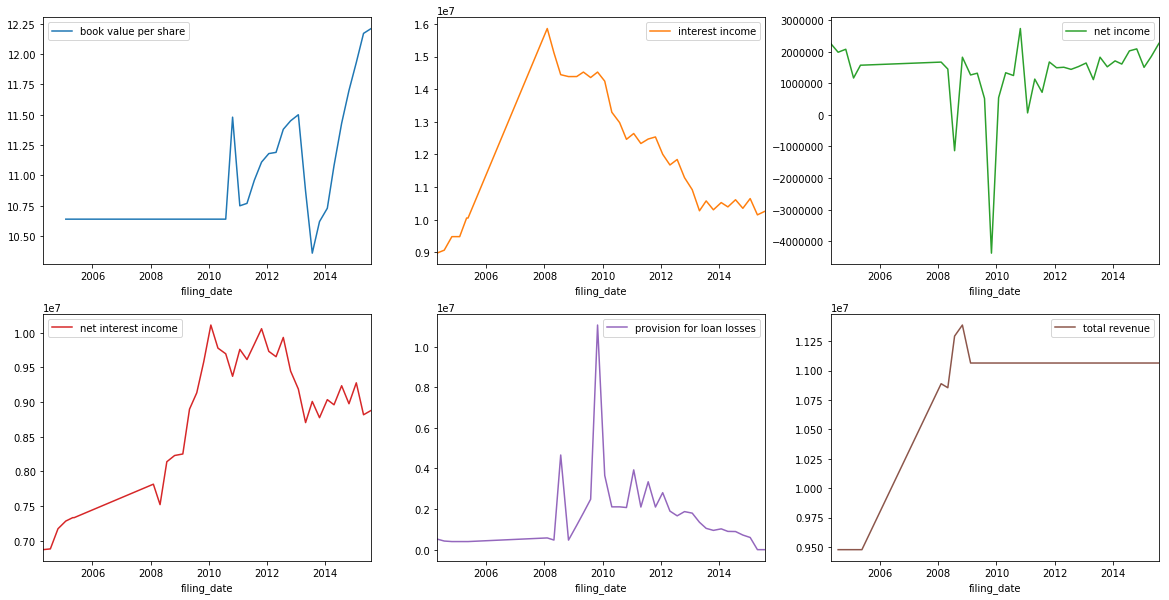

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0000737210 book value per share        2004Q1 to 2004Q3: 3 periods  missing   
           book value per share       2005Q1 to 2010Q2: 22 periods  missing   
           interest income                                  2004Q4  missing   
           interest income            2005Q2 to 2007Q3: 10 periods  missing   
           net income                 2005Q2 to 2007Q3: 10 periods  missing   
           net interest income        2005Q2 to 2007Q3: 10 periods  missing   
           provision for loan losses  2005Q2 to 2007Q3: 10 periods  missing   
           total revenue                                    2004Q1  missing   
           total revenue              2004Q3 to 2007Q3: 13 periods  missing   
           total revenue              2009Q1 to 2015Q2: 26 periods  missing   

                                             message  
cik        item                                       
0000737210 book value per share       Missing period  
           book value per share       Missing period  
           interest income            Missing period  
           interest income            Missing period  
           net income                 Missing period  
           net interest income        Missing period  
           provision for loan losses  Missing period  
           total revenue              Missing period  
           total revenue              Missing period  
           total revenue              Missing period

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()